# MESC analysis

In [1]:
setwd("~/project-gandalm/isoform_twas/MESC/")
library(data.table)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
all.gene <- read.table("out/all.gene.SCZ.Clozuk.2018.all.h2med", header = T, stringsAsFactors = F)

In [5]:
all.gene

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
h2med,0.01313009,0.00435822,0.03161524,0.0104617
h2nonmed,0.40217875,0.01551244,0.96838476,0.0104617
h2,0.41530883,0.01528402,1.00000000,0.0000000


In [3]:
all.iso <- read.table("out/all.iso.SCZ.Clozuk.2018.all.h2med", header = T, stringsAsFactors = F)

In [7]:
all.iso

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
h2med,0.02631269,0.007716729,0.06295599,0.01829824
h2nonmed,0.39164106,0.016179024,0.93704401,0.01829824
h2,0.41795375,0.015321560,1.00000000,0.00000000


In [4]:
all.intron <- read.table("out/all.intron.SCZ.Clozuk.2018.all.h2med", header = T, stringsAsFactors = F)

In [5]:
all.intron

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
h2med,0.01046139,0.007127689,0.02528293,0.01715304
h2nonmed,0.40331148,0.016085689,0.97471707,0.01715304
h2,0.41377287,0.015332047,1.00000000,0.00000000


In [8]:
egene <- read.table("out/gene.SCZ.Clozuk.2018.all.h2med", header = T, stringsAsFactors = F)

In [9]:
egene

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
h2med,0.01153767,0.004322936,0.02782777,0.01040629
h2nonmed,0.40307210,0.015548662,0.97217223,0.01040629
h2,0.41460977,0.015272720,1.00000000,0.00000000


In [28]:
df <- rbind(all.gene, all.iso, all.intron)
df$Category <- c(rep("All gene", 3), rep("All isoform", 3), rep("All intron", 3))
df <- df %>% filter(Quantity == "h2med")
df$Category <- factor(df$Category, levels = c("All gene", "All isoform", "All intron"))
df$ZSCORE.est_over_h2 <- df$Estimate_over_h2/df$SE.Estimate_over_h2
df$PVAL.est_over_h2 <- pnorm(df$ZSCORE.est_over_h2, lower.tail = FALSE)
df

Quantity,Estimate,SE.Estimate.,Estimate_over_h2,SE.Estimate_over_h2.,Category,ZSCORE.est_over_h2,PVAL.est_over_h2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
h2med,0.01313009,0.004358220,0.03161524,0.01046170,All gene,3.021998,0.0012555606
h2med,0.02631269,0.007716729,0.06295599,0.01829824,All isoform,3.440549,0.0002902672
h2med,0.01046139,0.007127689,0.02528293,0.01715304,All intron,1.473962,0.0702459074


In [32]:
signif_gene <- data.frame("Category" = "All gene", "Estimate_over_h2" = 0.03161524+0.01046170+0.002)
signif_iso <- data.frame("Category" = "All isoform", "Estimate_over_h2" = 0.06295599+0.01829824+0.002)

In [33]:
colors <- c("All gene" = "#1F77B4", "All isoform" = "#9467BD", "All intron" = "#2CA02C")

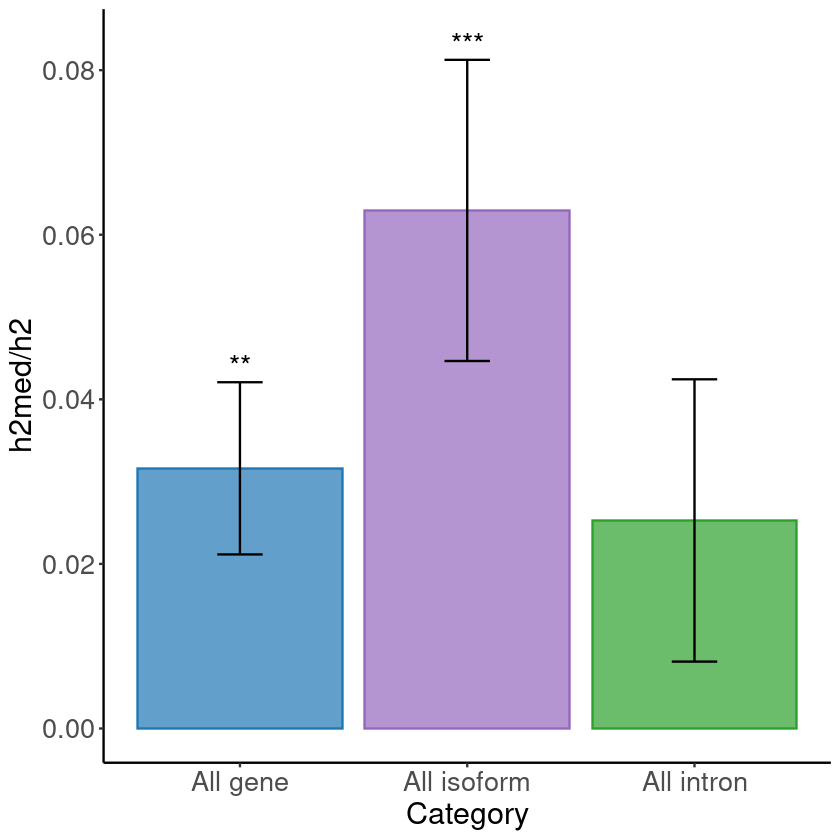

In [36]:
p <- ggplot(df, aes(x = Category, y = Estimate_over_h2)) +
    geom_bar(stat = "identity", aes(color = Category, fill = Category), alpha = 0.7) +
    scale_color_manual(values = colors) +
    scale_fill_manual(values = colors) +
    geom_errorbar(aes(ymin = (Estimate_over_h2 - SE.Estimate_over_h2.), 
                      ymax = (Estimate_over_h2 + SE.Estimate_over_h2.)), width=.2) +
    theme_classic() +
    labs(x = "Category",
         y = "h2med/h2") +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    geom_text(data = signif_gene, label = "**", size = 6) +
    geom_text(data = signif_iso, label = "***", size = 6)
p

In [37]:
ggsave("figures/mesc.pdf", p, height = 6, width = 6)